In [8]:
#Step 1: Load and Prepare the Data
import pandas as pd

# Define column names
columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Dividends', 'Stock Splits']

# Load CSV files into DataFrames
apple = pd.read_csv("../data/yfinance_data/AAPL_historical_data.csv", names=columns, skiprows=1)
amazon = pd.read_csv("../data/yfinance_data/AMZN_historical_data.csv", names=columns, skiprows=1)
google = pd.read_csv("../data/yfinance_data/GOOG_historical_data.csv", names=columns, skiprows=1)
meta = pd.read_csv("../data/yfinance_data/META_historical_data.csv", names=columns, skiprows=1)
microsoft = pd.read_csv("../data/yfinance_data/MSFT_historical_data.csv", names=columns, skiprows=1)
nvidia = pd.read_csv("../data/yfinance_data/NVDA_historical_data.csv", names=columns, skiprows=1)
tesla = pd.read_csv("../data/yfinance_data/TSLA_historical_data.csv", names=columns, skiprows=1)

# Convert Date column to datetime and set as index
def prepare_df(df):
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
    df.sort_index(inplace=True)
    return df

apple = prepare_df(apple)
amazon = prepare_df(amazon)
google = prepare_df(google)
meta = prepare_df(meta)
microsoft = prepare_df(microsoft)
nvidia = prepare_df(nvidia)
tesla = prepare_df(tesla)

# Show sample
print(apple.head())

                Open      High       Low     Close  Adj Close     Volume  \
Date                                                                       
1980-12-12  0.128348  0.128906  0.128348  0.128348   0.098943  469033600   
1980-12-15  0.122210  0.122210  0.121652  0.121652   0.093781  175884800   
1980-12-16  0.113281  0.113281  0.112723  0.112723   0.086898  105728000   
1980-12-17  0.115513  0.116071  0.115513  0.115513   0.089049   86441600   
1980-12-18  0.118862  0.119420  0.118862  0.118862   0.091630   73449600   

            Dividends  Stock Splits  
Date                                 
1980-12-12        0.0           0.0  
1980-12-15        0.0           0.0  
1980-12-16        0.0           0.0  
1980-12-17        0.0           0.0  
1980-12-18        0.0           0.0  


In [ ]:
#Step 3: Calculate Technical Indicators Using TA-Lib#import talib
import talib
print("TA-Lib imported successfully!")

TA-Lib imported successfully!


This ensures:

The Date column is converted to datetime.
The Date column is set as the index.
The data is sorted in chronological order.
Now, we can proceed with the next steps of Task 2: Quantitative Analysis using PyNance and TA-Lib , based on your current setup.

Step-by-Step Plan (Based on Your Existing Data Setup)
Step 1: Add Technical Indicators Using TA-Lib
We'll define a function to calculate common technical indicators like:

SMA – Simple Moving Average
EMA – Exponential Moving Average
RSI – Relative Strength Index
MACD – Moving Average Convergence Divergence
Make sure you have TA-Lib installed (which you've done).

In [10]:
import talib

def add_ta_indicators(df):
    df['SMA_20'] = talib.SMA(df['Close'], timeperiod=20)
    df['EMA_20'] = talib.EMA(df['Close'], timeperiod=20)
    df['RSI_14'] = talib.RSI(df['Close'], timeperiod=14)
    df['MACD'], df['MACD_signal'], df['MACD_hist'] = talib.MACD(df['Close'])
    return df

In [11]:
for df in [apple, amazon, google, meta, microsoft, nvidia, tesla]:
    add_ta_indicators(df)

In [12]:
print(apple[['Close', 'SMA_20', 'EMA_20', 'RSI_14']].tail(10))

                 Close      SMA_20      EMA_20     RSI_14
Date                                                     
2024-07-17  228.880005  220.862000  221.987169  63.587172
2024-07-18  224.179993  221.356500  222.196009  56.919750
2024-07-19  224.309998  222.088000  222.397341  57.053890
2024-07-22  223.960007  222.911501  222.546167  56.543451
2024-07-23  225.009995  223.755000  222.780817  57.764268
2024-07-24  218.539993  224.228500  222.376929  48.687742
2024-07-25  217.490005  224.440500  221.911508  47.386437
2024-07-26  217.960007  224.633500  221.535174  48.055700
2024-07-29  218.240005  225.014500  221.221349  48.476184
2024-07-30  218.800003  225.117001  220.990744  49.359115


In [13]:
#Step 2: Use PyNance for Financial Metrics
#Calculate daily returns and cumulative returns
import pynance
def compute_financial_metrics(df):
    df['Daily_Return'] = df['Close'].pct_change()
    df['Cumulative_Return'] = (1 + df['Daily_Return']).cumprod()
    df['Volatility'] = df['Daily_Return'].rolling(window=20).std() * (252 ** 0.5)
    return df

# Apply to Apple DataFrame
apple = compute_financial_metrics(apple)


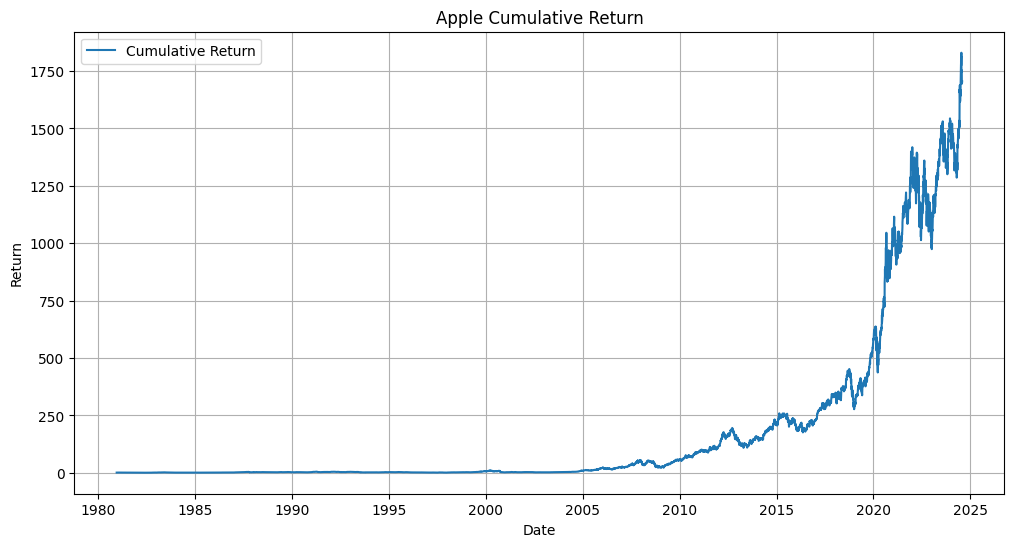

In [14]:
#Visualize cumulative return
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(apple.index, apple['Cumulative_Return'], label='Cumulative Return')
plt.title('Apple Cumulative Return')
plt.xlabel('Date')
plt.ylabel('Return')
plt.legend()
plt.grid(True)
plt.show()

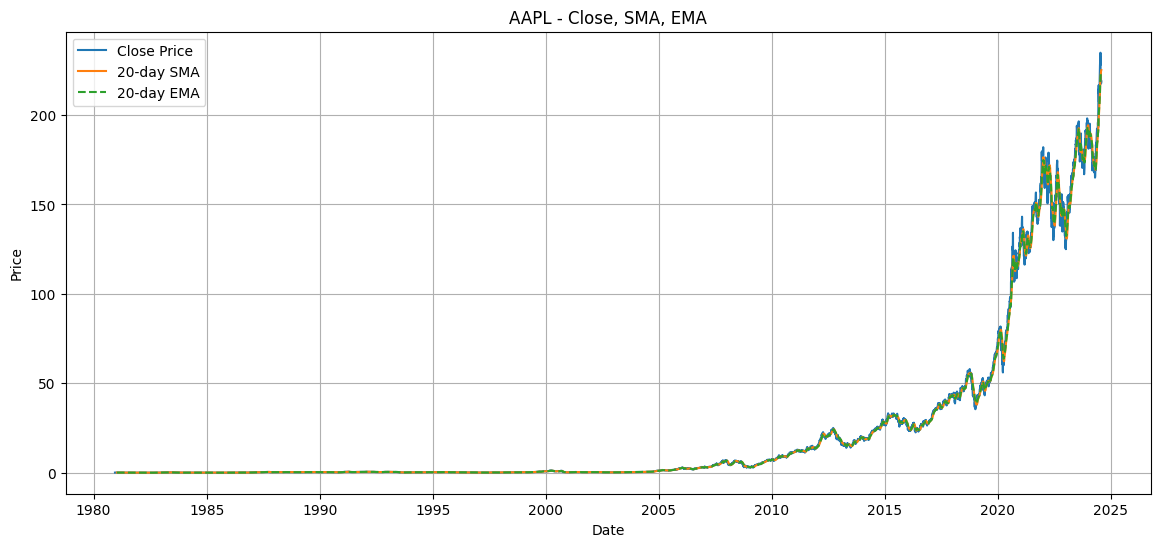

In [15]:
#Step 3: Visualize Indicators
#Let’s create reusable visualization functions:

#Closing Price vs SMA & EMA
def plot_sma_ema(ticker_name, df):
    plt.figure(figsize=(14, 6))
    plt.plot(df.index, df['Close'], label='Close Price')
    plt.plot(df.index, df['SMA_20'], label='20-day SMA')
    plt.plot(df.index, df['EMA_20'], label='20-day EMA', linestyle='--')
    plt.title(f"{ticker_name} - Close, SMA, EMA")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend()
    plt.grid(True)
    plt.show()

plot_sma_ema('AAPL', apple)

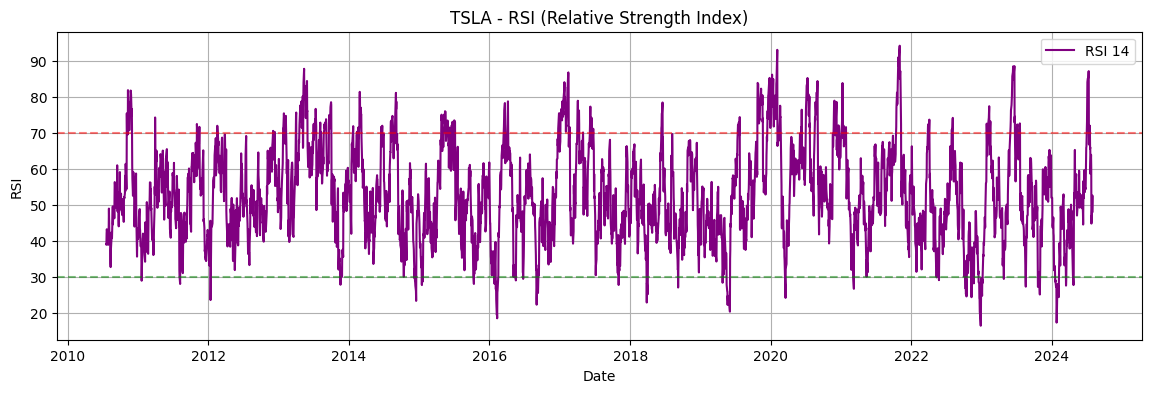

In [16]:
#RSI Visualization
def plot_rsi(ticker_name, df):
    plt.figure(figsize=(14, 4))
    plt.plot(df.index, df['RSI_14'], label='RSI 14', color='purple')
    plt.axhline(70, color='red', linestyle='--', alpha=0.5)
    plt.axhline(30, color='green', linestyle='--', alpha=0.5)
    plt.title(f"{ticker_name} - RSI (Relative Strength Index)")
    plt.xlabel("Date")
    plt.ylabel("RSI")
    plt.legend()
    plt.grid(True)
    plt.show()

plot_rsi('TSLA', tesla)

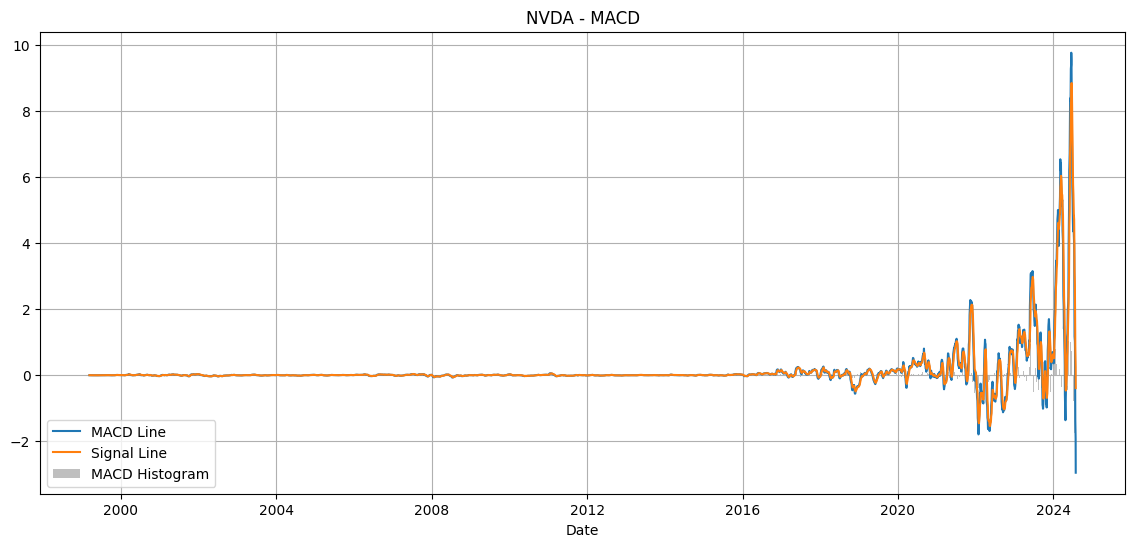

In [17]:
#MACD Visualization
def plot_macd(ticker_name, df):
    plt.figure(figsize=(14, 6))
    plt.plot(df.index, df['MACD'], label='MACD Line')
    plt.plot(df.index, df['MACD_signal'], label='Signal Line')
    plt.bar(df.index, df['MACD_hist'], label='MACD Histogram', color='gray', alpha=0.5)
    plt.title(f"{ticker_name} - MACD")
    plt.xlabel("Date")
    plt.legend()
    plt.grid(True)
    plt.show()

plot_macd('NVDA', nvidia)

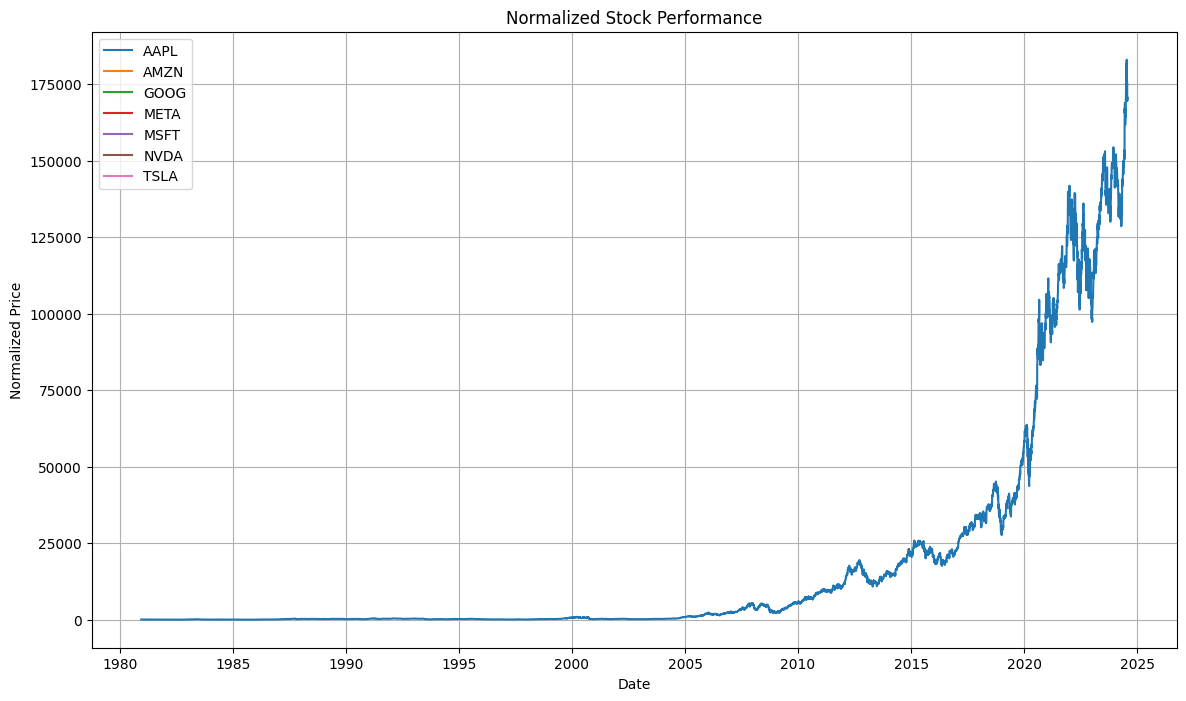

In [19]:
#Step 4: Compare Multiple Stocks
#Normalize closing prices to compare performance
comparison_df = pd.DataFrame({
    'AAPL': apple['Close'],
    'AMZN': amazon['Close'],
    'GOOG': google['Close'],
    'META': meta['Close'],
    'MSFT': microsoft['Close'],
    'NVDA': nvidia['Close'],
    'TSLA': tesla['Close']
})

# Normalize to start at 100
comparison_df = comparison_df / comparison_df.iloc[0] * 100

# Plot
plt.figure(figsize=(14, 8))
plt.plot(comparison_df)
plt.title("Normalized Stock Performance")
plt.xlabel("Date")
plt.ylabel("Normalized Price")
plt.legend(comparison_df.columns)
plt.grid(True)
plt.show()

In [ ]:
 #Step 5: Commit Work to Git
#Once everything works, commit changes with a descriptive message:

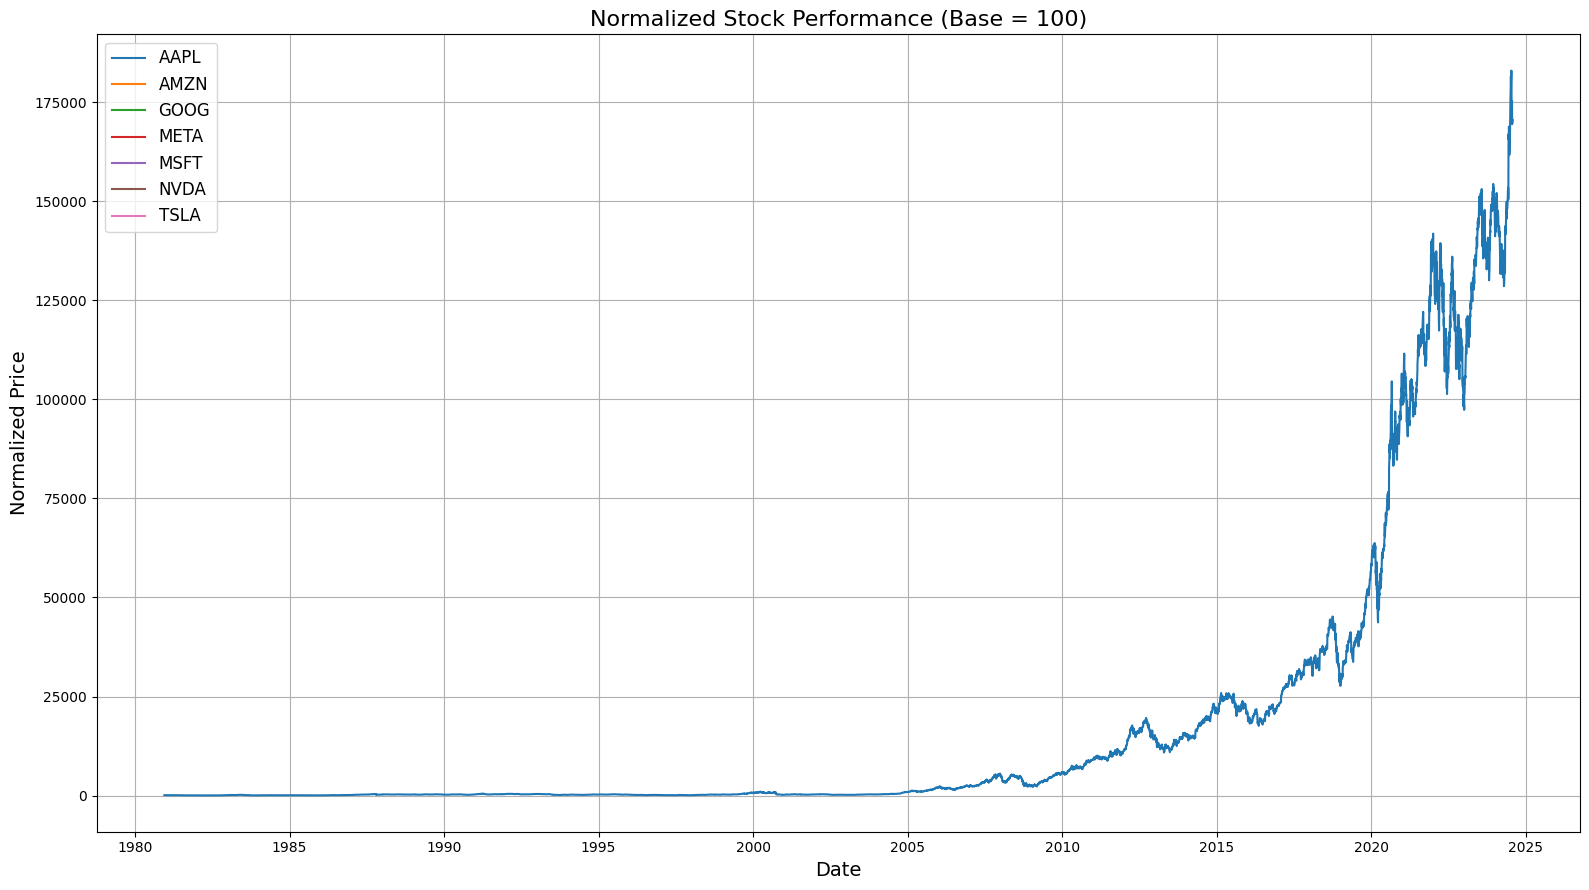

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load and prepare data (already done in your case)
# Assuming you've already prepared these DataFrames:
# apple, amazon, google, meta, microsoft, nvidia, tesla

# Step 2: Create a comparison DataFrame with Close prices
comparison_df = pd.DataFrame({
    'AAPL': apple['Close'],
    'AMZN': amazon['Close'],
    'GOOG': google['Close'],
    'META': meta['Close'],
    'MSFT': microsoft['Close'],
    'NVDA': nvidia['Close'],
    'TSLA': tesla['Close']
})

# Step 3: Normalize prices to start at 100
normalized_comparison = comparison_df / comparison_df.iloc[0] * 100

# Step 4: Plotting
plt.figure(figsize=(16, 9))
for column in normalized_comparison.columns:
    plt.plot(normalized_comparison.index, normalized_comparison[column], label=column)

plt.title("Normalized Stock Performance (Base = 100)", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Normalized Price", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

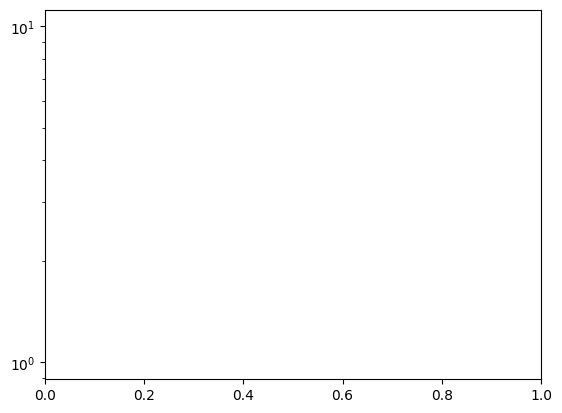

In [23]:
normalized_comparison = normalized_comparison.loc['2015-01-01':]
plt.yscale('log')


In [24]:
normalized_comparison.to_csv("normalized_stock_performance.csv")
print("Normalized performance saved to 'normalized_stock_performance.csv'")

Normalized performance saved to 'normalized_stock_performance.csv'
